List of singular value vectors generated:


*   List item
*   List item


# setup

In [1]:
!git clone https://github.com/wlg1/univ_feat_geom.git

Cloning into 'univ_feat_geom'...
remote: Enumerating objects: 293, done.
remote: Total 293 (delta 0), reused 0 (delta 0), pack-reused 293 (from 1)
Receiving objects: 100% (293/293), 132.24 MiB | 14.57 MiB/s, done.
Resolving deltas: 100% (164/164), done.
Updating files: 100% (135/135), done.


In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# load weight mats

Temporarily loading data from repo for convenience; larger files in the future will used a better storage system and not a repo

In [3]:
file_path = '/content/univ_feat_geom/data/ts-1L-21M_Wdec.pkl'
with open(file_path, 'rb') as f:
    weight_matrix_1 = pickle.load(f)
weight_matrix_1 = weight_matrix_1.detach().numpy()
print(weight_matrix_1.shape)

(16384, 1024)


In [4]:
file_path = '/content/univ_feat_geom/data/ts-2L-33M_Wdec.pkl'
with open(file_path, 'rb') as f:
    weight_matrix_2 = pickle.load(f)
weight_matrix_2 = weight_matrix_2.detach().numpy()
print(weight_matrix_2.shape)

(16384, 1024)


# Comparison Functions

In [163]:
def compare_singular_values(S1, S2):
    l2_distance = np.linalg.norm(S1 - S2)

    # Normalization by norm
    frobenius_norm1 = np.linalg.norm(S1)
    frobenius_norm2 = np.linalg.norm(S2)
    normalized_l2_distance = l2_distance / (frobenius_norm1 + frobenius_norm2)

    # Normalization by avg sum
    sum_singular_values1 = np.sum(S1)
    sum_singular_values2 = np.sum(S2)
    average_sum_singular_values = (sum_singular_values1 + sum_singular_values2) / 2
    percentage_l2_distance = (l2_distance / average_sum_singular_values) * 100

    print("(Singular values of the first matrix):", S1)
    print("(Singular values of the second matrix):", S2)
    print("L2 distance between singular values:", l2_distance)
    print("Normalized L2 distance between singular values:", normalized_l2_distance)
    print("Percentage L2 distance relative to the sum of singular values:", percentage_l2_distance)

    print('\n')

    # Normalize singular values
    S1_normalized = S1 / np.linalg.norm(S1)
    S2_normalized = S2 / np.linalg.norm(S2)

    l2_distance_normalized = np.linalg.norm(S1_normalized - S2_normalized)

    # Normalize the L2 distance
    frobenius_norm1 = np.linalg.norm(S1_normalized)
    frobenius_norm2 = np.linalg.norm(S2_normalized)
    normalized_l2_distance = l2_distance_normalized / (frobenius_norm1 + frobenius_norm2)

    # Normalization by avg sum
    sum_singular_values1 = np.sum(S1_normalized)
    sum_singular_values2 = np.sum(S2_normalized)
    average_sum_singular_values = (sum_singular_values1 + sum_singular_values2) / 2
    percentage_l2_distance = (l2_distance_normalized / average_sum_singular_values) * 100

    print("Normalized Singular Values (Matrix 1):", S1_normalized)
    print("Normalized Singular Values (Matrix 2):", S2_normalized)
    print("L2 distance between normalized singular values:", l2_distance_normalized)
    print("Normalized L2 distance between normalized singular values:", normalized_l2_distance)
    print("Percentage L2 distance relative to the sum of normalized singular values:", percentage_l2_distance)

    return l2_distance, l2_distance_normalized

In [6]:
import numpy as np

def generate_rand_svd(n, m):
    # Generate two random matrices of size n x m
    matrix1 = np.random.rand(n, m)
    matrix2 = np.random.rand(n, m)

    # Perform SVD on both matrices
    U1, S1_rand, Vt1 = np.linalg.svd(matrix1)
    U2, S2_rand, Vt2 = np.linalg.svd(matrix2)

    return(S1_rand, S2_rand)

In [165]:
matPair_to_l2Dist = {}
matPair_to_l2Dist_norma = {}

# compare SAEs on 2 LLMs

In [7]:
U1, S1_SAE, Vt1 = np.linalg.svd(weight_matrix_1)
U2, S2_SAE, Vt2 = np.linalg.svd(weight_matrix_2)

In [166]:
matPair_to_l2Dist['SAE_SAE'], matPair_to_l2Dist_norma['SAE_SAE'] = compare_singular_values(S1_SAE, S2_SAE)

(Singular values of the first matrix): [51.533367   19.960787   18.133106   ...  0.44218877  0.42903757
  0.26859504]
(Singular values of the second matrix): [54.123463   10.079735    8.61438    ...  0.49893224  0.4920625
  0.46698555]
L2 distance between singular values: 40.600677
Normalized L2 distance between singular values: 0.1957177
Percentage L2 distance relative to the sum of singular values: 1.69885728354048


Normalized Singular Values (Matrix 1): [0.4308114  0.16686927 0.15159012 ... 0.00369663 0.00358669 0.00224542]
Normalized Singular Values (Matrix 2): [0.6162595  0.11476967 0.09808488 ... 0.00568093 0.00560271 0.00531718]
L2 distance between normalized singular values: 0.24635288
Normalized L2 distance between normalized singular values: 0.12317644
Percentage L2 distance relative to the sum of normalized singular values: 1.0742520514028004


# compare to random weights

## compare two rand

In [16]:
n, m = weight_matrix_1.shape[0], weight_matrix_1.shape[1]
S1_rand, S2_rand = generate_rand_svd(n, m)

In [167]:
matPair_to_l2Dist['rand_rand'], matPair_to_l2Dist_norma['rand_rand'] = compare_singular_values(S1_rand, S2_rand)

(Singular values of the first matrix): [2048.63859922   46.17978071   46.03271273 ...   27.93064693   27.89107842
   27.7953967 ]
(Singular values of the second matrix): [2048.68294855   46.06332389   45.97595576 ...   27.96688431   27.86944035
   27.85899141]
L2 distance between singular values: 0.6852769727732871
Normalized L2 distance between singular values: 0.00014487341270046772
Percentage L2 distance relative to the sum of singular values: 0.0017326571254912147


Normalized Singular Values (Matrix 1): [0.86619259 0.01952545 0.01946326 ... 0.01180946 0.01179273 0.01175228]
Normalized Singular Values (Matrix 2): [0.86622504 0.01947652 0.01943957 ... 0.01182497 0.01178377 0.01177935]
L2 distance between normalized singular values: 0.00028931533842907703
Normalized L2 distance between normalized singular values: 0.00014465766921453852
Percentage L2 distance relative to the sum of normalized singular values: 0.001730076877016137


While we generally do not expect two random matrices to have highly similar singular values, the large size of the matrices (16384x1024) causes the singular values to stabilize and appear similar due to the reasons outlined above.

## compare rand to SAE

In [168]:
matPair_to_l2Dist['SAE_rand'], matPair_to_l2Dist_norma['SAE_rand'] = compare_singular_values(S1_SAE, S2_rand)

(Singular values of the first matrix): [51.533367   19.960787   18.133106   ...  0.44218877  0.42903757
  0.26859504]
(Singular values of the second matrix): [2048.68294855   46.06332389   45.97595576 ...   27.96688431   27.86944035
   27.85899141]
L2 distance between singular values: 2275.410196899121
Normalized L2 distance between singular values: 0.9157724790118973
Percentage L2 distance relative to the sum of singular values: 10.739009118110877


Normalized Singular Values (Matrix 1): [0.4308114  0.16686927 0.15159012 ... 0.00369663 0.00358669 0.00224542]
Normalized Singular Values (Matrix 2): [0.86622504 0.01947652 0.01943957 ... 0.01182497 0.01178377 0.01177935]
L2 distance between normalized singular values: 0.6919177591319333
Normalized L2 distance between normalized singular values: 0.34595887956596666
Percentage L2 distance relative to the sum of normalized singular values: 3.4284727918494067


# compare weight matrices of orig LLMs

## load and get svd

In [20]:
from transformers import AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained("roneneldan/TinyStories-1Layer-21M")
mlp_weights = model.transformer.h[0].mlp.c_fc.weight
mlp_weights.shape

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/269M [00:00<?, ?B/s]

torch.Size([4096, 1024])

In [21]:
model_2 = AutoModelForCausalLM.from_pretrained("roneneldan/TinyStories-2Layers-33M")
mlp_weights_2 = model_2.transformer.h[0].mlp.c_fc.weight
mlp_weights_2.shape

config.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/323M [00:00<?, ?B/s]

torch.Size([4096, 1024])

In [22]:
U1, S1_LLM, Vt1 = np.linalg.svd(mlp_weights.detach().numpy())
U2, S2_LLM, Vt2 = np.linalg.svd(mlp_weights_2.detach().numpy())

## compare LLMs (MLP0)

In [169]:
matPair_to_l2Dist['LLM_LLM_samelayer'], matPair_to_l2Dist_norma['LLM_LLM_samelayer'] = compare_singular_values(S1_LLM, S2_LLM)

(Singular values of the first matrix): [12.483639    6.156522    6.0103292  ...  0.67446536  0.4566468
  0.32894588]
(Singular values of the second matrix): [12.764987    6.1583524   5.954615   ...  0.38923234  0.3779573
  0.36897987]
L2 distance between singular values: 3.64023
Normalized L2 distance between singular values: 0.0260634
Percentage L2 distance relative to the sum of singular values: 0.17752614468019207


Normalized Singular Values (Matrix 1): [0.17697017 0.08727589 0.08520344 ... 0.00956133 0.0064735  0.00466319]
Normalized Singular Values (Matrix 2): [0.18465897 0.08908705 0.08613978 ... 0.00563066 0.00546755 0.00533768]
L2 distance between normalized singular values: 0.048038624
Normalized L2 distance between normalized singular values: 0.024019312
Percentage L2 distance relative to the sum of normalized singular values: 0.16361734376899165


## LLM to rand

In [170]:
matPair_to_l2Dist['LLM_rand'], matPair_to_l2Dist_norma['LLM_rand'] = compare_singular_values(S1_LLM, S1_rand)

(Singular values of the first matrix): [12.483639    6.156522    6.0103292  ...  0.67446536  0.4566468
  0.32894588]
(Singular values of the second matrix): [2048.63859922   46.17978071   46.03271273 ...   27.93064693   27.89107842
   27.7953967 ]
L2 distance between singular values: 2321.331324901598
Normalized L2 distance between singular values: 0.9530650258725484
Percentage L2 distance relative to the sum of singular values: 11.14914577578478


Normalized Singular Values (Matrix 1): [0.17697017 0.08727589 0.08520344 ... 0.00956133 0.0064735  0.00466319]
Normalized Singular Values (Matrix 2): [0.86619259 0.01952545 0.01946326 ... 0.01180946 0.01179273 0.01175228]
L2 distance between normalized singular values: 0.8605254384381891
Normalized L2 distance between normalized singular values: 0.43026271921909454
Percentage L2 distance relative to the sum of normalized singular values: 3.714452133551602


## LLM_1 (MLP0) to LLM_2 (MLP1)

In [25]:
mlp_weights_2b = model_2.transformer.h[1].mlp.c_fc.weight  # Example for GPT-like models
mlp_weights_2b.shape

torch.Size([4096, 1024])

In [26]:
U2, S2_LLM_MLP1, Vt2 = np.linalg.svd(mlp_weights_2b.detach().numpy())

In [171]:
matPair_to_l2Dist['LLM_LLM_difflayer'], matPair_to_l2Dist_norma['LLM_LLM_difflayer'] = compare_singular_values(S1_LLM, S2_LLM_MLP1)

(Singular values of the first matrix): [12.483639    6.156522    6.0103292  ...  0.67446536  0.4566468
  0.32894588]
(Singular values of the second matrix): [11.038577    6.0251775   5.6920376  ...  0.56828624  0.50219357
  0.39337894]
L2 distance between singular values: 1.8857149
Normalized L2 distance between singular values: 0.013459543
Percentage L2 distance relative to the sum of singular values: 0.09090751807576634


Normalized Singular Values (Matrix 1): [0.17697017 0.08727589 0.08520344 ... 0.00956133 0.0064735  0.00466319]
Normalized Singular Values (Matrix 2): [0.158688   0.08661654 0.08182739 ... 0.00816955 0.00721942 0.00565512]
L2 distance between normalized singular values: 0.023004001
Normalized L2 distance between normalized singular values: 0.0115020005
Percentage L2 distance relative to the sum of normalized singular values: 0.07768599306605432


## compare saes to LLMs

In [172]:
matPair_to_l2Dist['LLM_SAE_sameMod'], matPair_to_l2Dist_norma['LLM_SAE_sameMod'] = compare_singular_values(S1_LLM, S1_SAE)

(Singular values of the first matrix): [12.483639    6.156522    6.0103292  ...  0.67446536  0.4566468
  0.32894588]
(Singular values of the second matrix): [51.533367   19.960787   18.133106   ...  0.44218877  0.42903757
  0.26859504]
L2 distance between singular values: 60.464577
Normalized L2 distance between singular values: 0.31796643
Percentage L2 distance relative to the sum of singular values: 2.4595690000021846


Normalized Singular Values (Matrix 1): [0.17697017 0.08727589 0.08520344 ... 0.00956133 0.0064735  0.00466319]
Normalized Singular Values (Matrix 2): [0.4308114  0.16686927 0.15159012 ... 0.00369663 0.00358669 0.00224542]
L2 distance between normalized singular values: 0.38446793
Normalized L2 distance between normalized singular values: 0.19223396
Percentage L2 distance relative to the sum of normalized singular values: 1.4439685918514156


In [173]:
matPair_to_l2Dist['LLM_SAE_diffMod'], matPair_to_l2Dist_norma['LLM_SAE_diffMod'] = compare_singular_values(S1_LLM, S2_SAE)

(Singular values of the first matrix): [12.483639    6.156522    6.0103292  ...  0.67446536  0.4566468
  0.32894588]
(Singular values of the second matrix): [54.123463   10.079735    8.61438    ...  0.49893224  0.4920625
  0.46698555]
L2 distance between singular values: 43.573296
Normalized L2 distance between singular values: 0.27514178
Percentage L2 distance relative to the sum of singular values: 2.1567810345952685


Normalized Singular Values (Matrix 1): [0.17697017 0.08727589 0.08520344 ... 0.00956133 0.0064735  0.00466319]
Normalized Singular Values (Matrix 2): [0.6162595  0.11476967 0.09808488 ... 0.00568093 0.00560271 0.00531718]
L2 distance between normalized singular values: 0.5081715
Normalized L2 distance between normalized singular values: 0.25408575
Percentage L2 distance relative to the sum of normalized singular values: 1.9607488380445075


# compare to gpt2 med

## load and get svd

In [30]:
gpt2_med = AutoModelForCausalLM.from_pretrained("openai-community/gpt2-medium")

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [31]:
mlp0_weights_gpt2_med = gpt2_med.transformer.h[0].mlp.c_fc.weight
mlp0_weights_gpt2_med.shape

torch.Size([1024, 4096])

In [32]:
U2, S_GPT2_0, Vt2 = np.linalg.svd(mlp0_weights_gpt2_med.detach().numpy())

In [33]:
S_GPT2_0.shape

(1024,)

## GPT2 L0

In [174]:
matPair_to_l2Dist['LLM_GPT2_sameLayer'], matPair_to_l2Dist_norma['LLM_GPT2_sameLayer'] = compare_singular_values(S2_LLM, S_GPT2_0)

(Singular values of the first matrix): [12.764987    6.1583524   5.954615   ...  0.38923234  0.3779573
  0.36897987]
(Singular values of the second matrix): [34.8373     22.285692   20.11617    ...  0.92588705  0.7650304
  0.7380823 ]
L2 distance between singular values: 140.22565
Normalized L2 distance between singular values: 0.50436693
Percentage L2 distance relative to the sum of singular values: 3.398827863980668


Normalized Singular Values (Matrix 1): [0.18465897 0.08908705 0.08613978 ... 0.00563066 0.00546755 0.00533768]
Normalized Singular Values (Matrix 2): [0.16676885 0.10668334 0.09629767 ... 0.00443229 0.00366226 0.00353326]
L2 distance between normalized singular values: 0.09416299
Normalized L2 distance between normalized singular values: 0.047081497
Percentage L2 distance relative to the sum of normalized singular values: 0.31931965707363946


In [175]:
matPair_to_l2Dist['LLM_GPT2_diffLayer'], matPair_to_l2Dist_norma['LLM_GPT2_diffLayer'] = compare_singular_values(S2_LLM_MLP1, S_GPT2_0)

(Singular values of the first matrix): [11.038577    6.0251775   5.6920376  ...  0.56828624  0.50219357
  0.39337894]
(Singular values of the second matrix): [34.8373     22.285692   20.11617    ...  0.92588705  0.7650304
  0.7380823 ]
L2 distance between singular values: 139.67618
Normalized L2 distance between singular values: 0.50160724
Percentage L2 distance relative to the sum of singular values: 3.366098966012683


Normalized Singular Values (Matrix 1): [0.158688   0.08661654 0.08182739 ... 0.00816955 0.00721942 0.00565512]
Normalized Singular Values (Matrix 2): [0.16676885 0.10668334 0.09629767 ... 0.00443229 0.00366226 0.00353326]
L2 distance between normalized singular values: 0.08103228
Normalized L2 distance between normalized singular values: 0.040516146
Percentage L2 distance relative to the sum of normalized singular values: 0.272470864514217


## to mid layer of GPT2_med

In [36]:
mlp7_weights_gpt2_med = gpt2_med.transformer.h[7].mlp.c_fc.weight
mlp7_weights_gpt2_med.shape

torch.Size([1024, 4096])

In [37]:
U2, S_GPT2_7, Vt2 = np.linalg.svd(mlp7_weights_gpt2_med.detach().numpy())

In [38]:
compare_singular_values(S1_LLM, S_GPT2_7)

(Singular values of the first matrix): [12.483639    6.156522    6.0103292  ...  0.67446536  0.4566468
  0.32894588]
(Singular values of the second matrix): [38.283348  19.853462  18.42683   ...  1.3392195  1.2193433  1.1025848]
L2 distance between singular values: 145.55544
Normalized L2 distance between singular values: 0.5079842
Percentage L2 distance relative to the sum of singular values: 3.4666401588411158


Normalized Singular Values (Matrix 1): [0.17697017 0.08727589 0.08520344 ... 0.00956133 0.0064735  0.00466319]
Normalized Singular Values (Matrix 2): [0.17724231 0.09191655 0.08531161 ... 0.00620025 0.00564525 0.00510469]
L2 distance between normalized singular values: 0.044126574
Normalized L2 distance between normalized singular values: 0.022063287
Percentage L2 distance relative to the sum of normalized singular values: 0.15004346100137053


In [39]:
compare_singular_values(S_GPT2_0, S_GPT2_7)

(Singular values of the first matrix): [34.8373     22.285692   20.11617    ...  0.92588705  0.7650304
  0.7380823 ]
(Singular values of the second matrix): [38.283348  19.853462  18.42683   ...  1.3392195  1.2193433  1.1025848]
L2 distance between singular values: 22.271751
Normalized L2 distance between singular values: 0.05241767
Percentage L2 distance relative to the sum of singular values: 0.3549893561672941


Normalized Singular Values (Matrix 1): [0.16676885 0.10668334 0.09629767 ... 0.00443229 0.00366226 0.00353326]
Normalized Singular Values (Matrix 2): [0.17724231 0.09191655 0.08531161 ... 0.00620025 0.00564525 0.00510469]
L2 distance between normalized singular values: 0.09938153
Normalized L2 distance between normalized singular values: 0.049690764
Percentage L2 distance relative to the sum of normalized singular values: 0.3364591144751721


# compare to pythia

## load and get svd

In [40]:
from transformers import GPTNeoXForCausalLM, AutoTokenizer

model_pythia410 = GPTNeoXForCausalLM.from_pretrained(
  "EleutherAI/pythia-410m",
)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/911M [00:00<?, ?B/s]

In [41]:
model_pythia410.gpt_neox.layers[0].mlp

GPTNeoXMLP(
  (dense_h_to_4h): Linear(in_features=1024, out_features=4096, bias=True)
  (dense_4h_to_h): Linear(in_features=4096, out_features=1024, bias=True)
  (act): GELUActivation()
)

In [42]:
model_pythia410_weights_mlp0 = model_pythia410.gpt_neox.layers[0].mlp.dense_4h_to_h.weight
model_pythia410_weights_mlp0.shape

torch.Size([1024, 4096])

In [43]:
U1, S_pythia410_mlp0, Vt1 = np.linalg.svd(model_pythia410_weights_mlp0.detach().numpy())

In [176]:
matPair_to_l2Dist_pythia = matPair_to_l2Dist.copy()
matPair_to_l2Dist_norma_pythia = matPair_to_l2Dist_norma.copy()

## L0

In [177]:
matPair_to_l2Dist_pythia['pythia_rand'], matPair_to_l2Dist_norma_pythia['pythia_rand'] = compare_singular_values(S_pythia410_mlp0, S2_rand)

(Singular values of the first matrix): [3.5718095  2.2339969  1.9763415  ... 0.40511042 0.31147727 0.08539316]
(Singular values of the second matrix): [2048.68294855   46.06332389   45.97595576 ...   27.96688431   27.86944035
   27.85899141]
L2 distance between singular values: 2343.9394533600357
Normalized L2 distance between singular values: 0.9758889864376971
Percentage L2 distance relative to the sum of singular values: 11.517837947727577


Normalized Singular Values (Matrix 1): [0.09711178 0.0607388  0.05373356 ... 0.0110143  0.00846857 0.0023217 ]
Normalized Singular Values (Matrix 2): [0.86622504 0.01947652 0.01943957 ... 0.01182497 0.01178377 0.01177935]
L2 distance between normalized singular values: 0.9168226511551473
Normalized L2 distance between normalized singular values: 0.4584113392392961
Percentage L2 distance relative to the sum of normalized singular values: 3.8157649545442687


In [178]:
matPair_to_l2Dist_pythia['pythia_LLM'], matPair_to_l2Dist_norma_pythia['pythia_LLM'] = compare_singular_values(S_pythia410_mlp0, S1_LLM)

(Singular values of the first matrix): [3.5718095  2.2339969  1.9763415  ... 0.40511042 0.31147727 0.08539316]
(Singular values of the second matrix): [12.483639    6.156522    6.0103292  ...  0.67446536  0.4566468
  0.32894588]
L2 distance between singular values: 35.51397
Normalized L2 distance between singular values: 0.33091253
Percentage L2 distance relative to the sum of singular values: 2.1914267271554673


Normalized Singular Values (Matrix 1): [0.09711178 0.0607388  0.05373356 ... 0.0110143  0.00846857 0.0023217 ]
Normalized Singular Values (Matrix 2): [0.17697017 0.08727589 0.08520344 ... 0.00956133 0.0064735  0.00466319]
L2 distance between normalized singular values: 0.21637279
Normalized L2 distance between normalized singular values: 0.108186394
Percentage L2 distance relative to the sum of normalized singular values: 0.7100825318053678


In [179]:
matPair_to_l2Dist_pythia['pythia_GPT'], matPair_to_l2Dist_norma_pythia['pythia_GPT'] = compare_singular_values(S_pythia410_mlp0, S_GPT2_0)

(Singular values of the first matrix): [3.5718095  2.2339969  1.9763415  ... 0.40511042 0.31147727 0.08539316]
(Singular values of the second matrix): [34.8373     22.285692   20.11617    ...  0.92588705  0.7650304
  0.7380823 ]
L2 distance between singular values: 172.8472
Normalized L2 distance between singular values: 0.7035572
Percentage L2 distance relative to the sum of singular values: 4.676903828670911


Normalized Singular Values (Matrix 1): [0.09711178 0.0607388  0.05373356 ... 0.0110143  0.00846857 0.0023217 ]
Normalized Singular Values (Matrix 2): [0.16676885 0.10668334 0.09629767 ... 0.00443229 0.00366226 0.00353326]
L2 distance between normalized singular values: 0.18127304
Normalized L2 distance between normalized singular values: 0.09063653
Percentage L2 distance relative to the sum of normalized singular values: 0.5923998418135851


In [180]:
matPair_to_l2Dist_pythia['pythia_GPT.L7'], matPair_to_l2Dist_norma_pythia['pythia_GPT.L7'] = compare_singular_values(S_pythia410_mlp0, S_GPT2_7)

(Singular values of the first matrix): [3.5718095  2.2339969  1.9763415  ... 0.40511042 0.31147727 0.08539316]
(Singular values of the second matrix): [38.283348  19.853462  18.42683   ...  1.3392195  1.2193433  1.1025848]
L2 distance between singular values: 180.53325
Normalized L2 distance between singular values: 0.71420586
Percentage L2 distance relative to the sum of singular values: 4.839278992349839


Normalized Singular Values (Matrix 1): [0.09711178 0.0607388  0.05373356 ... 0.0110143  0.00846857 0.0023217 ]
Normalized Singular Values (Matrix 2): [0.17724231 0.09191655 0.08531161 ... 0.00620025 0.00564525 0.00510469]
L2 distance between normalized singular values: 0.24441516
Normalized L2 distance between normalized singular values: 0.12220758
Percentage L2 distance relative to the sum of normalized singular values: 0.8074449092049357


## L17

In [49]:
model_pythia410_weights_mlp17 = model_pythia410.gpt_neox.layers[17].mlp.dense_4h_to_h.weight  # Example for GPT-like models
model_pythia410_weights_mlp17.shape

torch.Size([1024, 4096])

In [50]:
U1, S_pythia410_mlp17, Vt1 = np.linalg.svd(model_pythia410_weights_mlp17.detach().numpy())

In [51]:
compare_singular_values(S_pythia410_mlp0, S_pythia410_mlp17)

(Singular values of the first matrix): [3.5718095  2.2339969  1.9763415  ... 0.40511042 0.31147727 0.08539316]
(Singular values of the second matrix): [4.483849   3.7432733  3.6153734  ... 0.34852073 0.30791458 0.09956443]
L2 distance between singular values: 10.75429
Normalized L2 distance between singular values: 0.13017902
Percentage L2 distance relative to the sum of singular values: 0.8461361801275343


Normalized Singular Values (Matrix 1): [0.09711178 0.0607388  0.05373356 ... 0.0110143  0.00846857 0.0023217 ]
Normalized Singular Values (Matrix 2): [0.0978341  0.08167531 0.07888463 ... 0.00760445 0.00671846 0.00217242]
L2 distance between normalized singular values: 0.14147322
Normalized L2 distance between normalized singular values: 0.07073661
Percentage L2 distance relative to the sum of normalized singular values: 0.45894495978732264


In [52]:
compare_singular_values(S_pythia410_mlp17, S1_LLM)

(Singular values of the first matrix): [4.483849   3.7432733  3.6153734  ... 0.34852073 0.30791458 0.09956443]
(Singular values of the second matrix): [12.483639    6.156522    6.0103292  ...  0.67446536  0.4566468
  0.32894588]
L2 distance between singular values: 25.673023
Normalized L2 distance between singular values: 0.22061156
Percentage L2 distance relative to the sum of singular values: 1.476179617287453


Normalized Singular Values (Matrix 1): [0.0978341  0.08167531 0.07888463 ... 0.00760445 0.00671846 0.00217242]
Normalized Singular Values (Matrix 2): [0.17697017 0.08727589 0.08520344 ... 0.00956133 0.0064735  0.00466319]
L2 distance between normalized singular values: 0.12252057
Normalized L2 distance between normalized singular values: 0.061260287
Percentage L2 distance relative to the sum of normalized singular values: 0.40888239631373513


In [53]:
compare_singular_values(S_pythia410_mlp17, S_GPT2_0)

(Singular values of the first matrix): [4.483849   3.7432733  3.6153734  ... 0.34852073 0.30791458 0.09956443]
(Singular values of the second matrix): [34.8373     22.285692   20.11617    ...  0.92588705  0.7650304
  0.7380823 ]
L2 distance between singular values: 163.33432
Normalized L2 distance between singular values: 0.64121354
Percentage L2 distance relative to the sum of singular values: 4.28212612089261


Normalized Singular Values (Matrix 1): [0.0978341  0.08167531 0.07888463 ... 0.00760445 0.00671846 0.00217242]
Normalized Singular Values (Matrix 2): [0.16676885 0.10668334 0.09629767 ... 0.00443229 0.00366226 0.00353326]
L2 distance between normalized singular values: 0.095897116
Normalized L2 distance between normalized singular values: 0.047948558
Percentage L2 distance relative to the sum of normalized singular values: 0.3186688909724934


In [54]:
compare_singular_values(S_pythia410_mlp17, S1_SAE)

(Singular values of the first matrix): [4.483849   3.7432733  3.6153734  ... 0.34852073 0.30791458 0.09956443]
(Singular values of the second matrix): [51.533367   19.960787   18.133106   ...  0.44218877  0.42903757
  0.26859504]
L2 distance between singular values: 82.25396
Normalized L2 distance between singular values: 0.49715155
Percentage L2 distance relative to the sum of singular values: 3.9006180646133806


Normalized Singular Values (Matrix 1): [0.0978341  0.08167531 0.07888463 ... 0.00760445 0.00671846 0.00217242]
Normalized Singular Values (Matrix 2): [0.4308114  0.16686927 0.15159012 ... 0.00369663 0.00358669 0.00224542]
L2 distance between normalized singular values: 0.4908783
Normalized L2 distance between normalized singular values: 0.24543916
Percentage L2 distance relative to the sum of normalized singular values: 1.8194132596829986


# summarize results

In [183]:
def plot_dict_on_number_line(data):
    # Sort the dictionary by its values
    sorted_data = sorted(data.items(), key=lambda x: x[1])

    # Extract keys and values for plotting
    keys = [item[0] for item in sorted_data]
    values = [item[1] for item in sorted_data]

    # Assign a unique color to each key
    colors = plt.cm.viridis(np.linspace(0, 1, len(keys)))

    # Create a figure and a plot
    fig, ax = plt.subplots()

    # Plot each point on the number line with a unique color
    for i, (key, value) in enumerate(zip(keys, values)):
        ax.scatter(value, 0, color=colors[i], label=key, s=100)  # 's' adjusts the size of the point

    # Hide y-axis as it's not needed
    ax.yaxis.set_visible(False)

    # Set title and grid
    ax.set_title('Values on a Number Line')
    ax.grid(True)

    # Create a legend
    ax.legend(title="Key", loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)

    # Show the plot
    plt.show()

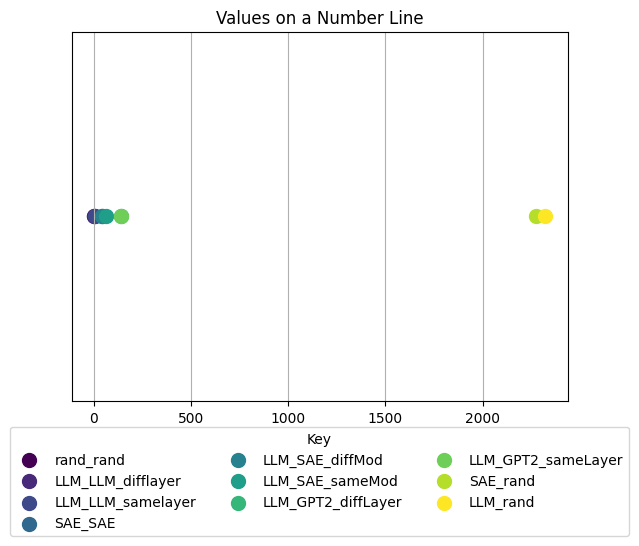

In [77]:
plot_dict_on_number_line(matPair_to_l2Dist)

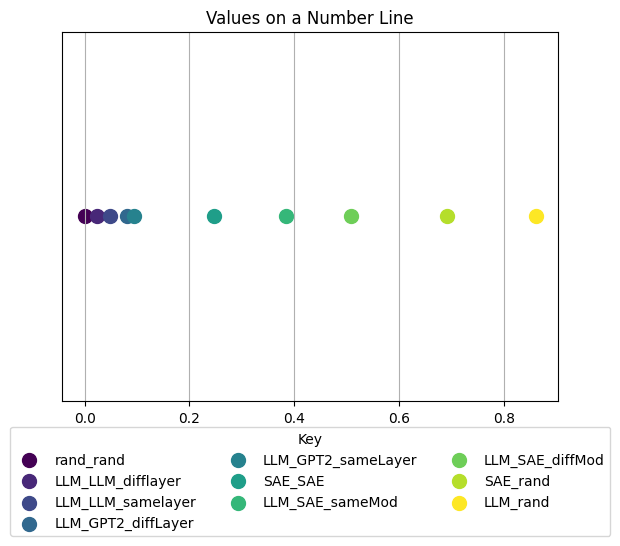

In [184]:
plot_dict_on_number_line(matPair_to_l2Dist_norma)

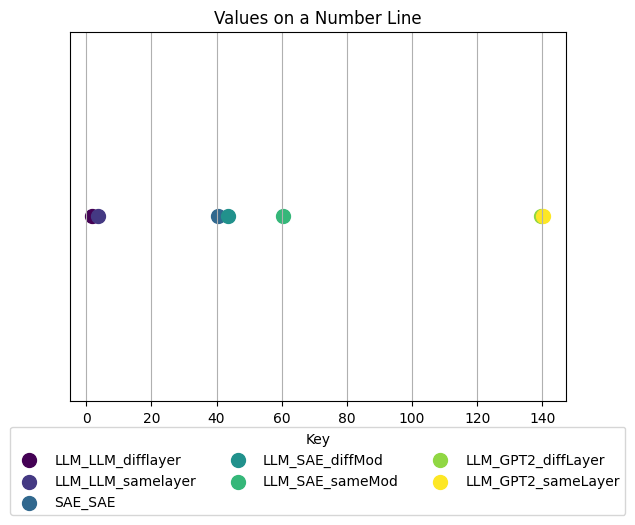

In [79]:
matPair_to_l2Dist_2 = matPair_to_l2Dist.copy()
del matPair_to_l2Dist_2['rand_rand']
del matPair_to_l2Dist_2['SAE_rand']
del matPair_to_l2Dist_2['LLM_rand']

plot_dict_on_number_line(matPair_to_l2Dist_2)

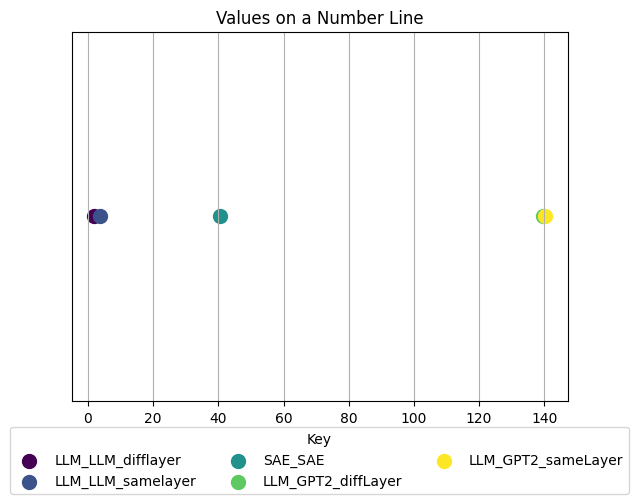

In [80]:
matPair_to_l2Dist_2 = matPair_to_l2Dist.copy()
del matPair_to_l2Dist_2['rand_rand']
del matPair_to_l2Dist_2['SAE_rand']
del matPair_to_l2Dist_2['LLM_rand']
del matPair_to_l2Dist_2['LLM_SAE_sameMod']
del matPair_to_l2Dist_2['LLM_SAE_diffMod']

plot_dict_on_number_line(matPair_to_l2Dist_2)

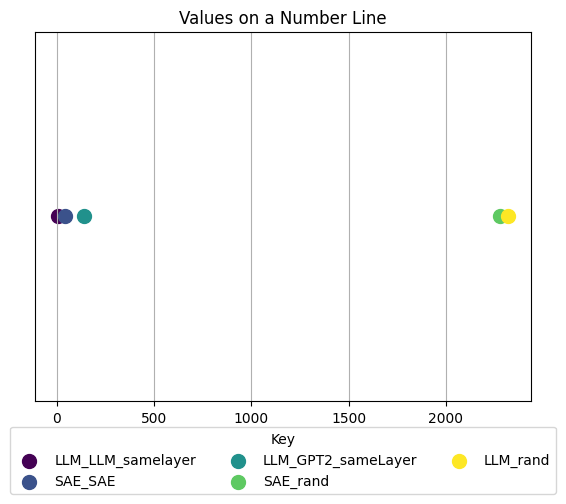

In [192]:
matPair_to_l2Dist_2 = matPair_to_l2Dist.copy()
del matPair_to_l2Dist_2['rand_rand']
# del matPair_to_l2Dist_2['SAE_rand']
# del matPair_to_l2Dist_2['LLM_rand']
del matPair_to_l2Dist_2['LLM_LLM_difflayer']
del matPair_to_l2Dist_2['LLM_GPT2_diffLayer']
del matPair_to_l2Dist_2['LLM_SAE_sameMod']
del matPair_to_l2Dist_2['LLM_SAE_diffMod']

plot_dict_on_number_line(matPair_to_l2Dist_2)

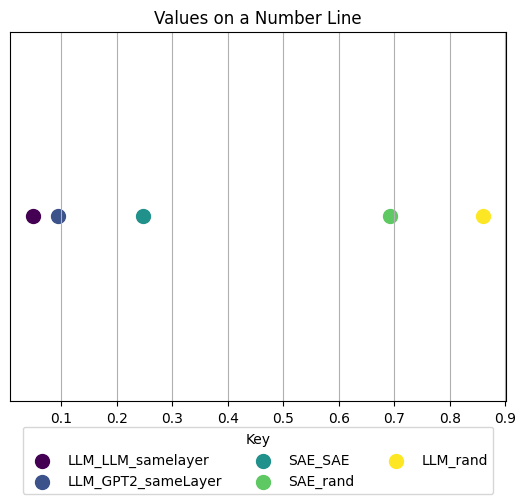

In [191]:
matPair_to_l2Dist_norma_2 = matPair_to_l2Dist_norma.copy()
del matPair_to_l2Dist_norma_2['rand_rand']
# del matPair_to_l2Dist_norma_2['SAE_rand']
# del matPair_to_l2Dist_norma_2['LLM_rand']
del matPair_to_l2Dist_norma_2['LLM_LLM_difflayer']
del matPair_to_l2Dist_norma_2['LLM_GPT2_diffLayer']
del matPair_to_l2Dist_norma_2['LLM_SAE_sameMod']
del matPair_to_l2Dist_norma_2['LLM_SAE_diffMod']

plot_dict_on_number_line(matPair_to_l2Dist_norma_2)

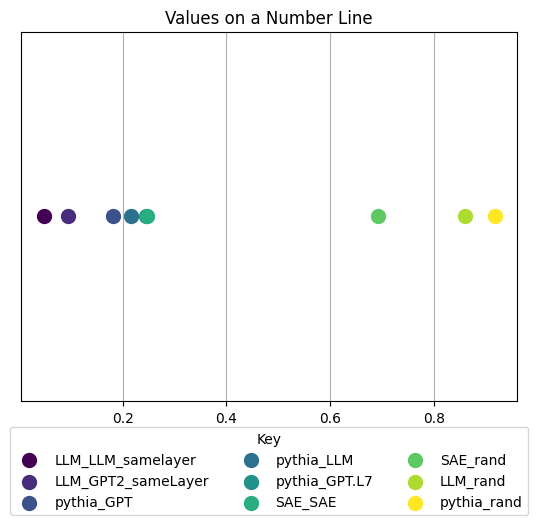

In [193]:
matPair_to_l2Dist_norma_pythia_2 = matPair_to_l2Dist_norma_pythia.copy()
del matPair_to_l2Dist_norma_pythia_2['rand_rand']
# del matPair_to_l2Dist_norma_pythia_2['SAE_rand']
# del matPair_to_l2Dist_norma_pythia_2['LLM_rand']
del matPair_to_l2Dist_norma_pythia_2['LLM_LLM_difflayer']
del matPair_to_l2Dist_norma_pythia_2['LLM_GPT2_diffLayer']
del matPair_to_l2Dist_norma_pythia_2['LLM_SAE_sameMod']
del matPair_to_l2Dist_norma_pythia_2['LLM_SAE_diffMod']

plot_dict_on_number_line(matPair_to_l2Dist_norma_pythia_2)

## single num line plots

In [196]:
def plot1D_dict_on_number_line(data):
    sorted_data = sorted(data.items(), key=lambda x: x[1])
    keys = [item[0] for item in sorted_data]
    values = [item[1] for item in sorted_data]
    colors = plt.cm.viridis(np.linspace(0, 1, len(keys))) # Assign a unique color to each key

    fig, ax = plt.subplots(figsize=(10, 2))
    for i, (key, value) in enumerate(zip(keys, values)):
        ax.scatter(value, 0, color=colors[i], s=100)  # 's' adjusts the size of the point
        # Labels next to pts
        if i % 2 == 0:
            ax.text(value, 0.02, f'{key}', ha='center', color=colors[i])
        else:
            ax.text(value + 1, 0.05, f'{key}', ha='center', color=colors[i])
        # Draw vertical line from point to the horizontal axis
        ax.axvline(x=value, ymin=0, ymax=0.4, color=colors[i], linewidth=1, linestyle='--')

    ax.set_ylim(-0.05, 0.1)
    ax.yaxis.set_visible(False)
    ax.set_title('L2 dist for singular vals of matrix pairs')
    for spine in ax.spines.values():
        if spine.spine_type != 'bottom':  # Keep only the bottom spine
            spine.set_visible(False)
    ax.grid(False)

    fig.tight_layout(pad=2) # make less big

    plt.show()

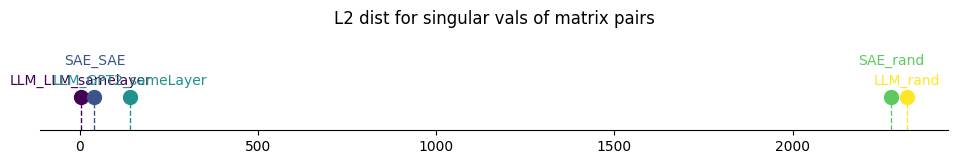

In [197]:
plot1D_dict_on_number_line(matPair_to_l2Dist_2)

<ipython-input-196-022360bc39e3>:26: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout(pad=2) # make less big


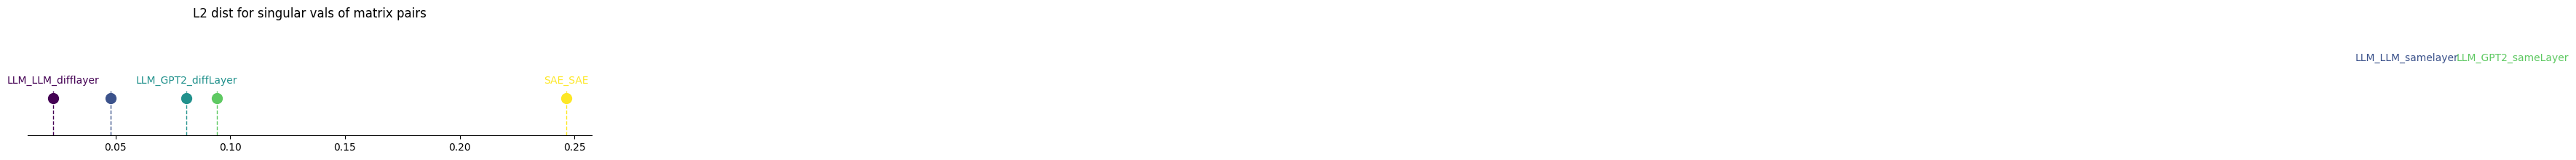

In [198]:
matPair_to_l2Dist_norma_2 = matPair_to_l2Dist_norma.copy()
del matPair_to_l2Dist_norma_2['rand_rand']
del matPair_to_l2Dist_norma_2['SAE_rand']
del matPair_to_l2Dist_norma_2['LLM_rand']
del matPair_to_l2Dist_norma_2['LLM_SAE_sameMod']
del matPair_to_l2Dist_norma_2['LLM_SAE_diffMod']

plot1D_dict_on_number_line(matPair_to_l2Dist_norma_2)

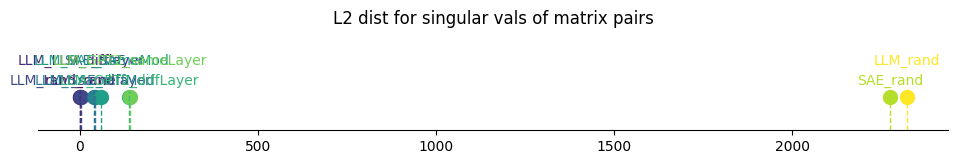

In [162]:
plot1D_dict_on_number_line(matPair_to_l2Dist)

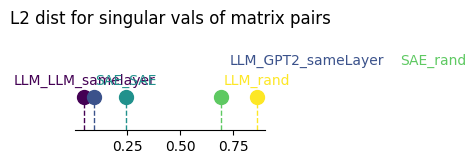

In [199]:
matPair_to_l2Dist_norma_2 = matPair_to_l2Dist_norma.copy()
del matPair_to_l2Dist_norma_2['rand_rand']
# del matPair_to_l2Dist_norma_2['SAE_rand']
# del matPair_to_l2Dist_norma_2['LLM_rand']
del matPair_to_l2Dist_norma_2['LLM_LLM_difflayer']
del matPair_to_l2Dist_norma_2['LLM_GPT2_diffLayer']
del matPair_to_l2Dist_norma_2['LLM_SAE_sameMod']
del matPair_to_l2Dist_norma_2['LLM_SAE_diffMod']

plot1D_dict_on_number_line(matPair_to_l2Dist_norma_2)